# 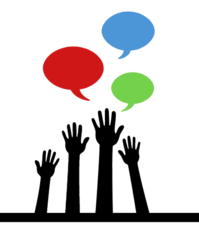

# The Sparks Foundation
## Graduate Rotational Internship Program (GRIP) April2021 Batch
## Data Science & Business Analytics 

# Task - 1 Predict the percentage of an student based on the no. of study hours
## Prediction using Supervised ML                                                          
By: Kavali Kranthi Kumar                                

In [1]:
# Importing all libraries required in this notebook
import numpy as np #For numerical operations
import pandas as pd #For handling the dataset
import matplotlib.pyplot as plt #For visualization
%matplotlib inline

### Importing and reading the dataset

In [2]:
df = pd.read_csv('student_scores - student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Exploring about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


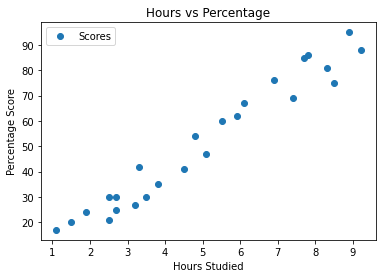

In [6]:
# Plotting and Visualing the data
df.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### From the above correlation graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Splitting the data into training and testing

In [7]:
#preprocessing the data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [8]:
#splitting the dataset into training and testing.We'll do this by using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42) 

### Model_selection and training the model

In [9]:
#We have split our data into training and testing sets, and now is finally the time to train our algorithm
#For this task, we are using simple Linear Regression model from scikit-learn library
from sklearn.linear_model import LinearRegression  
reg= LinearRegression()  
reg.fit(X_train, y_train) 
print("Training complete.")

Training complete.


### Testing the model on test data

In [10]:
#let check the model performance on test data
y_pred = reg.predict(X_test) 
#Comparing Actual vs Predicted
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### Visualizing the regression line on the data

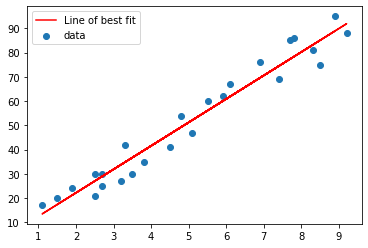

In [11]:
#Plotting the regression line 
line = reg.coef_*X+reg.intercept_
plt.scatter(X,y,label='data')
plt.plot(X, line,label='Line of best fit',color='r')
plt.legend()
plt.show()

In [12]:
#Accuracy of model on test data
print('Accuracy:',reg.score(X_test,y_test))
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Accuracy: 0.9678055545167994
Mean Absolute Error: 3.9207511902099244


### Making prediction real time on user input

In [13]:
#Giving real time user input
hours = float(input())
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

9.75
No of Hours = 9.75
Predicted Score = 97.22715435984279
